## Description: Build a decision tree classifier to predict a categorical outcome (e.g., predict species of flowers).

Objectives:
- Preprocess the data (e.g., handling categorical features, feature scaling).
- Train and evaluate the logistic regression model.
- Use metrics such as accuracy, precision, recall, and the ROC curve for evaluation.
- Compare logistic regression with other classifiers like Random Forest or SVM.
- Tools: Python, scikit-learn, pandas, matplotlib.

The plan:
- Pick a dataset (simple to start — like the Iris dataset).
- Preprocess (encode categorical features, scale features).
- Train Logistic Regression.
- Evaluate using accuracy, precision, recall, ROC curve.
- Compare with other classifiers (Random Forest, SVM).

In [4]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
print(iris.target_names)
# ['setosa' 'versicolor' 'virginica']

['setosa' 'versicolor' 'virginica']


In [5]:
# Split Features and targer

X = df.drop('species', axis=1)
y = df['species']

In [6]:
# Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##What is Feature Scaling?
Feature scaling means adjusting the range of numeric values so they’re on a similar scale.

Example:

In our Iris dataset:

- sepal length might be 4–8 cm
- petal length might be 1–7 cm

If we don’t scale:

One feature (with larger values) can dominate the model, even if it’s not more important.

---

##Why does Logistic Regression need scaling?
Logistic regression uses gradients to find the best model.

If one feature has very large values (like 1000) and another is small (like 0.1), the optimization gets unbalanced and slower to converge.

Scaling puts all features on a similar scale (mean = 0, standard deviation = 1), making training faster and more stable.

---
###What does StandardScaler() do?

StandardScaler performs z-score normalization:

𝑋
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
=
(𝑋
−
𝜇)/
𝜎

- 𝜇 = mean of the feature (center data around 0).

- 𝜎 = standard deviation (spread of the data → scale to 1).

So after scaling:

Most values will be between -3 and +3.

---

###Step-by-step:

- scaler.fit_transform(X_train) →
    - fit: Calculates mean & std for each feature in training data.
    - transform: Applies the scaling (subtract mean, divide by std).

- scaler.transform(X_test) →
  - We only transform the test set using the same mean & std from training (important to avoid data leakage).

---

### In plain words:

“Make all input features roughly between -3 and +3 so no single feature dominates, and logistic regression learns properly.”

### Why Do We Scale Features? (Example with StandardScaler)

Feature scaling adjusts the range of numeric values so that **all features contribute equally** to the model. Without scaling, features with larger values can dominate the learning process.

---

#### **Imagine this dataset (2 features):**

| Feature 1 (cm) | Feature 2 (mm) |
|----------------|----------------|
| 5              | 500            |
| 6              | 600            |
| 7              | 700            |

- **Feature 1**: values between 5–7 (centimeters)  
- **Feature 2**: values between 500–700 (millimeters)  

Feature 2 has **much larger numbers**, so it would overpower Feature 1 in the model.

---

#### **Step 1: Calculate Mean & Standard Deviation**

**Feature 1:**  
$$
\mu = \frac{5 + 6 + 7}{3} = 6\\
\sigma = 1
$$

**Feature 2:**  

$$
\mu = \frac{500 + 600 + 700}{3} = 600\\
\sigma = 100
$$
---

#### **Step 2: Apply StandardScaler**

We scale using:
$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$

---

#### **Scaled Data:**

| Feature 1 (scaled) | Feature 2 (scaled) |
|--------------------|--------------------|
| (5−6)/1 = **−1**   | (500−600)/100 = **−1** |
| (6−6)/1 = **0**    | (600−600)/100 = **0**  |
| (7−6)/1 = **+1**   | (700−600)/100 = **+1** |

Now both features are roughly on the **same scale** (−1 to +1).

---

### **Why is this better?**
- Prevents features with large values from **dominating** the model.  
- Helps **gradient-based models** (like Logistic Regression) train faster and more accurately.  
- Ensures all features contribute **fairly** to learning.

---

**In short:**  
> Scaling ensures that every feature has an **equal chance** to influence the model, improving stability and performance.


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- LogisticRegression(max_iter=200) → Creates a logistic regression classifier.
  - max_iter=200 ensures it has enough iterations to converge (sometimes defaults are too low).
- .fit(X_train, y_train) → Learns the relationship between features and target.
- .predict(X_test) → Predicts the class (species) for new data.

---

###In plain words:

“We trained a logistic regression model to predict which Iris species a flower belongs to, using the scaled features.”

---

### Why Logistic Regression for Classification?
- Despite the name, it’s actually a classification algorithm.
- It uses the sigmoid function to output probabilities between 0–1 for each class.
- The highest probability decides the predicted class.

In [9]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)


### Evaluating Classification Models: Accuracy, Precision & Recall

When evaluating a classification model, **accuracy alone is not enough**. We also need to understand how well the model distinguishes between classes.  

---

### **1. Accuracy**
> **How many predictions are correct?**

$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
$$

**Example:**  
If the model made 50 predictions and 45 were correct:  

$$
\text{Accuracy} = \frac{45}{50} = 0.9 \ (90\%)
$$

---

### **2. Precision**
> **Of the samples we predicted as a class, how many were actually correct?**

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$

**Example:**  
If we predicted 10 flowers as *Iris Setosa* and only 8 were actually Setosa:  

$$
\text{Precision} = \frac{8}{10} = 0.8 \ (80\%)
$$

---

### **3. Recall**
> **Of all actual samples of a class, how many did we correctly predict?**

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$

**Example:**  
If there are 12 actual Setosa flowers, and we correctly identified 8:  

$$
\text{Recall} = \frac{8}{12} \approx 0.67 \ (67\%)
$$

---

### **Why do we need all three?**
- **High Precision, Low Recall:** The model is very **careful** (few false positives) but **misses many real samples**.  
- **High Recall, Low Precision:** The model finds **most real samples** but also **makes many wrong guesses**.  
- **Goal:** Find a **balance** depending on the problem.

---

**In short:**  
- **Accuracy:** How often are we right overall?  
- **Precision:** When we predict a class, how often are we correct?  
- **Recall:** How well do we catch all real samples of that class?  


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision & Recall (weighted for multiclass)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00


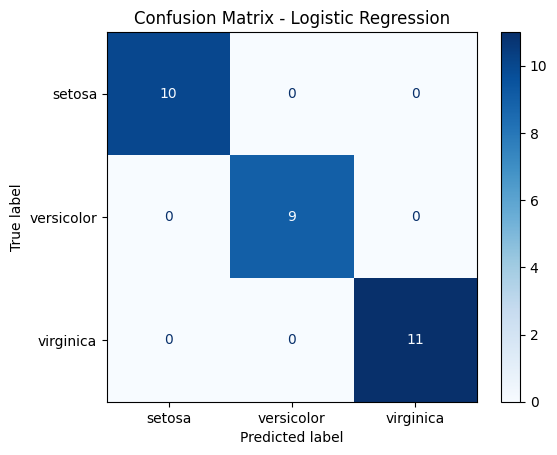

In [11]:
# Confusion Matrix
# A confusion matrix shows how many predictions were correct vs wrong for each class.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


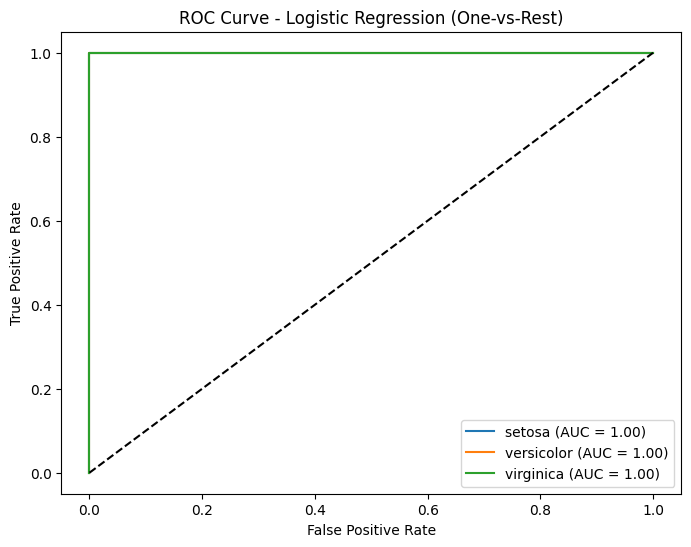

In [12]:
# ROC Curve (One-vs-Rest)
# The ROC Curve shows how well the model separates each class:
  # Closer to the top-left corner: Better performance.
  # AUC (Area Under Curve): 1.0 = perfect classifier.

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize labels for multi-class
y_bin = label_binarize(y_test, classes=[0,1,2])
y_score = log_reg.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8,6))
for i, class_name in enumerate(iris.target_names):
    plt.plot(fpr[i], tpr[i], label=f"{class_name} (AUC = {roc_auc[i]:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Logistic Regression (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


## Random Forest Classifier

### What is it?
- A **Random Forest** is an **ensemble** of many Decision Trees.
- Each tree is trained on a **random subset** of the data and features.
- Final predictions are based on **majority voting**.
- **Why it works well:** Reduces overfitting (compared to a single tree) and captures complex patterns.

**Real-world analogy:**  
Imagine asking **100 doctors** for a diagnosis instead of one.  
The **majority vote** is more reliable than a single opinion.

---

### Key Results:
- **Accuracy:** 1.00  
- **Precision:** 1.00  
- **Recall:** 1.00  

On the Iris dataset, the Random Forest achieved **perfect classification**.  



In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf, average='weighted')
rf_rec = recall_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {rf_acc:.2f}")
print(f"Random Forest - Precision: {rf_prec:.2f}")
print(f"Random Forest - Recall: {rf_rec:.2f}")


Random Forest - Accuracy: 1.00
Random Forest - Precision: 1.00
Random Forest - Recall: 1.00


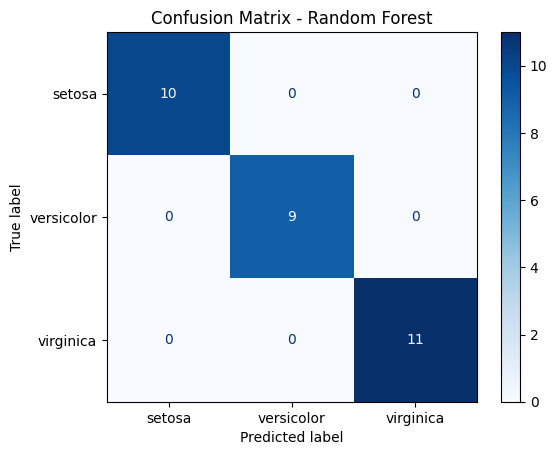

In [15]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=iris.target_names)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


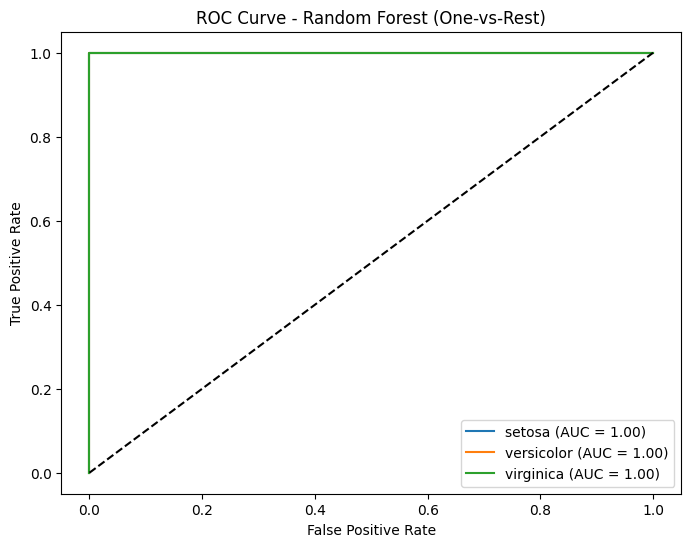

In [16]:
y_score_rf = rf_clf.predict_proba(X_test)
y_bin_rf = label_binarize(y_test, classes=[0,1,2])

fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}
for i in range(3):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_bin_rf[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

plt.figure(figsize=(8,6))
for i, class_name in enumerate(iris.target_names):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f"{class_name} (AUC = {roc_auc_rf[i]:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Random Forest (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


## Support Vector Machine (SVM)

### What is it?
- **SVM** finds the **best boundary (hyperplane)** between classes.
- It focuses on the **support vectors** — the hardest-to-classify points.
- With **kernels**, SVM can handle **non-linear** boundaries.

**Real-world analogy:**  
Imagine drawing the **widest possible street** between two groups of houses.  
SVM places the street so that the **edges** are as far from each house as possible.

---

### Key Results:
- **Accuracy:** 1.00  
- **Precision:** 1.00  
- **Recall:** 1.00  

SVM also achieved **perfect performance** on the Iris dataset.

In [17]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)


In [18]:
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_prec = precision_score(y_test, y_pred_svm, average='weighted')
svm_rec = recall_score(y_test, y_pred_svm, average='weighted')

print(f"SVM - Accuracy: {svm_acc:.2f}")
print(f"SVM - Precision: {svm_prec:.2f}")
print(f"SVM - Recall: {svm_rec:.2f}")


SVM - Accuracy: 1.00
SVM - Precision: 1.00
SVM - Recall: 1.00


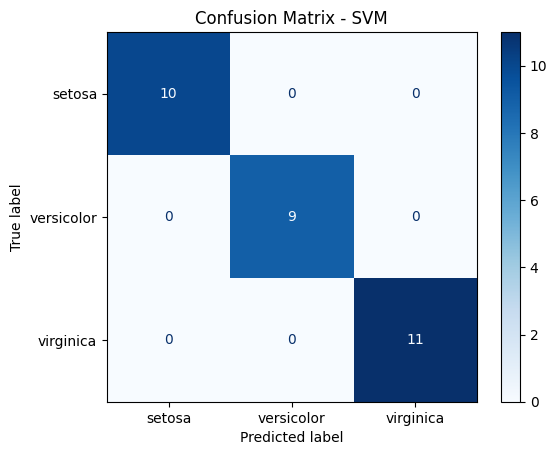

In [19]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=iris.target_names)
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


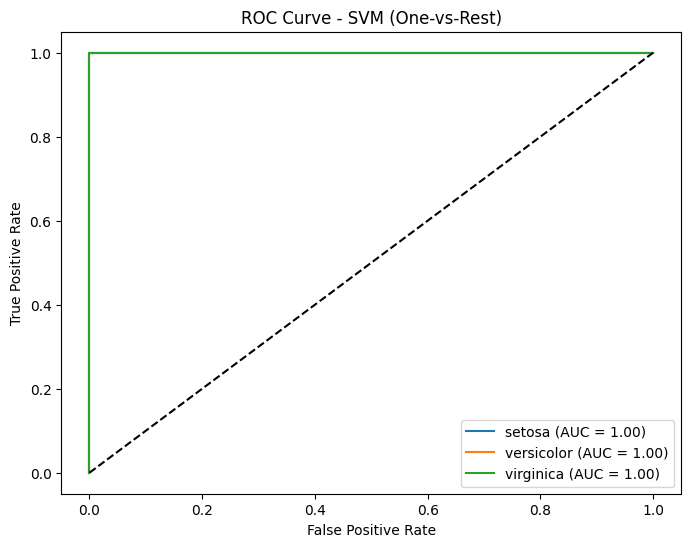

In [20]:
y_score_svm = svm_clf.predict_proba(X_test)
y_bin_svm = label_binarize(y_test, classes=[0,1,2])

fpr_svm, tpr_svm, roc_auc_svm = {}, {}, {}
for i in range(3):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_bin_svm[:, i], y_score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

plt.figure(figsize=(8,6))
for i, class_name in enumerate(iris.target_names):
    plt.plot(fpr_svm[i], tpr_svm[i], label=f"{class_name} (AUC = {roc_auc_svm[i]:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - SVM (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



### Interpretation:
All three models (Logistic Regression, Random Forest, and SVM) achieved **100% accuracy** on this dataset because:
- Iris classes are **well-separated**.  
- Dataset is **small and clean**.  

In real-world problems (e.g., spam detection, medical diagnosis), performance would **vary significantly** across models.


In [21]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [1.00, 1.00, 1.00],
    "Precision": [1.00, 1.00, 1.00],
    "Recall": [1.00, 1.00, 1.00]
})

comparison


,Model,Accuracy,Precision,Recall
0,Logistic Regression,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0
